In [1]:
import sys
#sys.path
sys.path[0] = '/home/alvaroaguilar/nestsmart/nestsmart'

In [2]:
import utils, Asset
import numpy as np
import xarray as xr
import pandas as pd

In [3]:
from icecream import ic

In [4]:
from UQpy.sampling import MonteCarloSampling
from UQpy.run_model.RunModel import RunModel
from UQpy.run_model.model_execution.PythonModel import PythonModel
from UQpy.distributions import Normal
import time

In [21]:
nsims = 250

first_year = 2024
number_years = 15

In [22]:
d = Normal(loc=0.05, scale=0.174)
x_mcs = MonteCarloSampling(distributions=[d]*number_years, nsamples=nsims, random_state=987979)
#Names = ['var1', 'var11', 'var111']

# UQpy returns samples as an ndarray
#print("Monte Carlo samples of three random variables from a standard normal distribution.")
#print('Samples stored as an array:')
#print('Data type:', type(x_mcs.samples))
#print('Number of samples:', len(x_mcs.samples))
#print('Dimensions of samples:', np.shape(x_mcs.samples))
#print('Samples')


#print(x_mcs.samples)

In [23]:
first_year = 2024
number_years = 15


# Call to RunModel - Here we run the model while instantiating the RunModel object.
m = PythonModel(model_script='utils.py', 
                model_object_name='uqpy_wrapper_balances_eop',
                initial_investment=489000,
                inflows = [0]*number_years,
                outflows = [0]*number_years,
                #years=[2000,2001,2003,2004])
                years = first_year + np.arange(0,number_years+1))
m11 = RunModel(model=m, ntasks=1 )
m11.run(samples=x_mcs.samples,)
#print("The values returned from the Matlab simulation:")
#print(m11.qoi_list)

In [24]:
len(m11.qoi_list)

250

In [25]:
dat = xr.concat(m11.qoi_list,dim='sim')

In [18]:
dat

<xarray.DataArray (sim: 50, year: 16)>
array([[ 489000.        ,  703341.92823802,  724317.07587355,
         748832.40376794,  989350.74887332, 1284405.73669131,
        1357531.87773026, 1664576.22353012, 2040901.83830359,
        2034019.0592834 , 1718084.61029478, 2587913.3236473 ,
        2576989.94967551, 2850238.52596804, 3279698.02421674,
        3501822.23314926],
       [ 489000.        ,  717004.29397012,  697629.49764387,
         597152.08592755,  639313.07506361,  595957.3567665 ,
         679146.5554141 ,  770390.46361967,  812086.64398352,
         722635.57297936,  781028.16605058,  748888.298158  ,
         631271.06082572,  800159.62958863,  747983.4746508 ,
         647756.28357093],
       [ 489000.        ,  490401.79900777,  662423.19222622,
         794837.37122197,  773295.53964915,  678349.79355217,
         731906.25836676,  579547.62936397,  562463.26938986,
         587651.05544908,  676325.31167569,  798228.93719939,
         744111.44447793,  749981.70050496,  863006.3380438 ,
         866961.56676352],
       [ 489000.        ,  523297.71757336,  700881.92321838,
         609341.79676277,  811148.90277389,  585732.13306981,
...
        1008537.947484  , 1242478.14384361, 1372004.1239609 ,
        1278826.59637579],
       [ 489000.        ,  399296.97344207,  369783.57742226,
         397644.72241418,  402628.66134249,  327726.44087671,
         329503.23316155,  370514.72737884,  417971.59892571,
         426116.23306668,  614514.46336242,  735591.98553073,
         619032.30261683,  445095.48410097,  498846.50981054,
         520061.58498164],
       [ 489000.        ,  480675.282133  ,  468641.77532435,
         491130.07680307,  668325.39626031,  895199.68182111,
         800551.18276569,  659546.7238019 ,  754534.74907367,
         791608.41995788,  978306.62291209,  920350.25212643,
        1204403.88315924, 1333536.82262155, 1539930.96610889,
        2370435.26071467],
       [ 489000.        ,  507436.79485535,  676633.75165852,
         554593.2023063 ,  528932.25552498,  523844.54166113,
         626346.92768333,  608457.86469345,  552910.38753037,
         550360.5255357 ,  416404.3005928 ,  415268.76873981,
         443495.02418518,  487453.75884339,  644694.12644355,
         723929.88192804]])
Coordinates:
  * year     (year) int64 2024 2025 2026 2027 2028 ... 2035 2036 2037 2038 2039
Dimensions without coordinates: sim

In [26]:
mean = dat.mean('sim')
std = dat.std('sim')
q3 = dat.quantile(0.032,dim='sim')
q97 = dat.quantile(0.968,dim='sim')

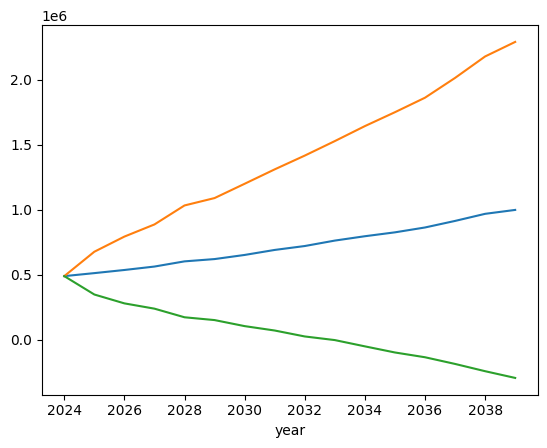

In [27]:
mean.plot()
(mean+2*std).plot()
(mean-2*std).plot()
#q3.plot()
#q97.plot()

In [ ]:
a = Asset.Asset(0,[10,10],[-1,-1],[0.1,0.1],[2000,2001,2002])

In [ ]:
a.balance_eop

In [ ]:
np.array([0.1,0.1])

In [ ]:
utils.uqpy_wrapper_balances_eop(input=np.array([[0.1,0.1,0.1]]))